# 과제1 - WEEK3
## Name 특징에서 유용한 정보 남기고 kdeplot 사용하기

과제1은 Stage2에 이어집니다. 아래는 @tage2에서 작성한 내용입니다.

---

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
df[['Pclass', 'Sex', 'Embarked']].head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


---

## 특징 생성

## 함께실습$2

In [3]:
# 테스트셋
df_test = pd.read_csv('data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 함께실습$3

## Age

In [4]:
# 쉬운 방법) 전체 나이 평균을 넣기
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [5]:
# 테스트셋에도 똑같이 적용해야함
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean());
# 마지막에 ; 을 뒤에 붙이면 out에 결과표시 생략

## 함께실습$4

## Fare

In [6]:
# 운임도 빈칸(NaN)이 있으면 채우기
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

# print(df.isnull().sum())
print(df_test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


## 함께실습$5

## FamilySize

In [7]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [8]:
# 테스트셋도 똑같이 적용
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']

## 미션$1

## Embarked

In [9]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df['Embarked'] = df['Embarked'].fillna('S')
df_test['Embarked'] = df_test['Embarked'].fillna('S')

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
dtype: int64

## Features to Numeric

## 함께실습$6

### embarked

In [11]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
# training set
df['Embarked'] = df['Embarked'].map({
    'S': 0,
    'C': 1,
    'Q': 2
});

# 테스트셋도 똑같이 적용
df_test['Embarked'] = df_test['Embarked'].map({
    'S': 0,
    'C': 1,
    'Q': 2
});

df['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

## 미션$2

### sex

In [13]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
# training set
df['Sex'] = df['Sex'].map({
    'male': 0,
    'female': 1
});

# 테스트셋도 똑같이 적용
df_test['Sex'] = df_test['Sex'].map({
    'male': 0,
    'female': 1
});

---

## 특징 추출

## 함께실습$7

In [15]:
# 더이상 필요 없는 열 삭제
train = df.drop(['Name', 'Ticket', 'SibSp', 'Parch', 'PassengerId', 'Cabin'], axis=1)
test = df_test.drop(['Name', 'Ticket', 'SibSp', 'Parch', 'PassengerId', 'Cabin'], axis=1)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,22.0,7.2500,0,1
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,0,1
4,0,3,0,35.0,8.0500,0,0


# 여기서부터 과제1이 시작됩니다.

---

## Level Up
### 빈칸(NaN)을 더 현명하게 처리하기

In [16]:
df[['Name', 'Age']].head(10)

,Name,Age
0,"Braund, Mr. Owen Harris",22.000000
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000
2,"Heikkinen, Miss. Laina",26.000000
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000
4,"Allen, Mr. William Henry",35.000000
5,"Moran, Mr. James",29.699118
6,"McCarthy, Mr. Timothy J",54.000000
7,"Palsson, Master. Gosta Leonard",2.000000
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000


In [17]:
# 쉬운 방법) 전체 나이 평균을 넣기 - stage2 기준
# df['Age'].fillna(df['Age'].mean())

# 개선된 방법) 이름에 들어가는 Mr. Mrs. Miss. 타이틀 정보 뽑기
df.loc[ df['Name'].str.contains('Mr\.'), 'Name' ] = 'Mr'
df.loc[ df['Name'].str.contains('Mrs\.'), 'Name' ] = 'Mrs'
df.loc[ df['Name'].str.contains('Miss\.'), 'Name' ] = 'Miss'
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,Mr,0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,Mrs,1,38.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,Miss,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,Mrs,1,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,Mr,0,35.0,0,0,373450,8.0500,NaN,0,0


In [18]:
df['Name'] = df['Name'].map({
    'Mr': 0,
    'Mrs': 1,
    'Miss': 2
})

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0.0,0,22.000000,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,1.0,1,38.000000,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,2.0,1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,1.0,1,35.000000,1,0,113803,53.1000,C123,0,1
4,5,0,3,0.0,0,35.000000,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0.0,0,29.699118,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0.0,0,54.000000,0,0,17463,51.8625,E46,0,0
7,8,0,3,NaN,0,2.000000,3,1,349909,21.0750,NaN,0,4
8,9,1,3,1.0,1,27.000000,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1.0,1,14.000000,1,0,237736,30.0708,NaN,1,1


In [19]:
df['Name'] = df['Name'].fillna(3)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0.0,0,22.000000,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,1.0,1,38.000000,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,2.0,1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,1.0,1,35.000000,1,0,113803,53.1000,C123,0,1
4,5,0,3,0.0,0,35.000000,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0.0,0,29.699118,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0.0,0,54.000000,0,0,17463,51.8625,E46,0,0
7,8,0,3,3.0,0,2.000000,3,1,349909,21.0750,NaN,0,4
8,9,1,3,1.0,1,27.000000,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1.0,1,14.000000,1,0,237736,30.0708,NaN,1,1


In [20]:
df['Name'].value_counts()

0.0    517
2.0    182
1.0    125
3.0     67
Name: Name, dtype: int64

In [21]:
df['Age'] = df['Age'].fillna( df.groupby('Name')['Age'].transform('mean') )
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0.0,0,22.000000,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,1.0,1,38.000000,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,2.0,1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,1.0,1,35.000000,1,0,113803,53.1000,C123,0,1
4,5,0,3,0.0,0,35.000000,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0.0,0,29.699118,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0.0,0,54.000000,0,0,17463,51.8625,E46,0,0
7,8,0,3,3.0,0,2.000000,3,1,349909,21.0750,NaN,0,4
8,9,1,3,1.0,1,27.000000,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1.0,1,14.000000,1,0,237736,30.0708,NaN,1,1


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

/Volumes/External1/Envs/Conda/ds/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


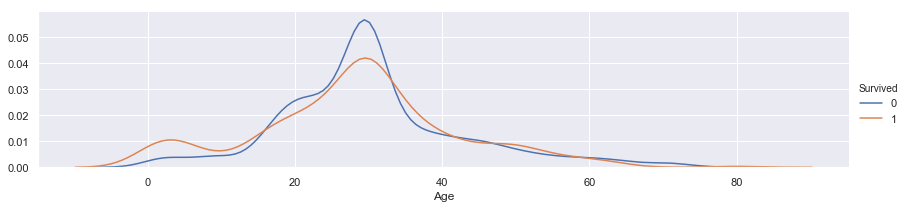

In [24]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age')
facet.add_legend()

plt.show()